In [2]:
import numpy as np
from numpy import expand_dims

# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import load_img

In [3]:
trainedModel = tf.keras.models.load_model(
    'C:\MakeAIWork2/projects/apple_disease_classification/models/17', 
    custom_objects=None, 
    compile=True, 
    options=None
)

In [3]:
# trainedModel.summary()

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 80

In [5]:
aql_dataset = tf.keras.utils.image_dataset_from_directory(
      "C:/MakeAIWork2/projects/apple_disease_classification/data/Use",
      shuffle=True,
      image_size=(IMAGE_SIZE, IMAGE_SIZE),
      batch_size = BATCH_SIZE 
      )

Found 80 files belonging to 1 classes.


In [6]:
aql_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/MakeAIWork2/projects/apple_disease_classification/data/Use",
    seed = 123,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 80 files belonging to 1 classes.


In [7]:
txtFiles = list()

useDirectory = "C:/MakeAIWork2/projects/apple_disease_classification/data/Use"

for filename in os.listdir(useDirectory):
    imgFile = os.path.join(useDirectory, filename)
    txtFiles.append(imgFile)          

# print(txtFiles)

In [8]:
txtFiles = [x for x in txtFiles if ".jpg" in x]
print(txtFiles[1])

IndexError: list index out of range

In [9]:
print(aql_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
aql_ds = aql_dataset.take(1)

In [11]:
len(aql_ds)

1

In [14]:
batchPredictions = trainedModel.predict(aql_ds)

# test_label = test_ds.class_names
# print(test_label)

predicted_categories = tf.argmax(batchPredictions, axis=1)

In [16]:
aql_labeled = list(predicted_categories)
print(aql_labeled)

[<tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tenso

In [11]:
import tensorflow as tf
import tensorflow_hub as hub

import PIL
import PIL.Image as Image

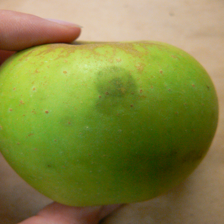

In [12]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

red_apple = Image.open("apple_green.jpg").resize(IMAGE_SHAPE)
red_apple

In [13]:
red_apple = np.array(red_apple)/255.0
red_apple.shape

(224, 224, 3)

In [14]:
red_apple[np.newaxis, ...]

array([[[[0.77647059, 0.6627451 , 0.54901961],
         [0.79607843, 0.66666667, 0.54509804],
         [0.79607843, 0.66666667, 0.58431373],
         ...,
         [0.71372549, 0.61960784, 0.51372549],
         [0.7254902 , 0.60392157, 0.49411765],
         [0.70588235, 0.61176471, 0.48627451]],

        [[0.78823529, 0.67058824, 0.56078431],
         [0.8       , 0.66666667, 0.54901961],
         [0.79607843, 0.67843137, 0.56470588],
         ...,
         [0.72941176, 0.61960784, 0.52941176],
         [0.73333333, 0.61568627, 0.51764706],
         [0.72156863, 0.61568627, 0.51372549]],

        [[0.79607843, 0.67843137, 0.55686275],
         [0.79215686, 0.68235294, 0.58431373],
         [0.8       , 0.69019608, 0.58431373],
         ...,
         [0.73333333, 0.63137255, 0.53333333],
         [0.72941176, 0.62352941, 0.50980392],
         [0.7254902 , 0.61568627, 0.50196078]],

        ...,

        [[0.30196078, 0.21176471, 0.10196078],
         [0.30196078, 0.20784314, 0.10980392]

In [15]:
result = classifier.predict(red_apple[np.newaxis, ...])
result.shape

(1, 1001)

In [16]:
predicted_label_index = np.argmax(result)
predicted_label_index

949

In [17]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[948:949]

['mushroom']

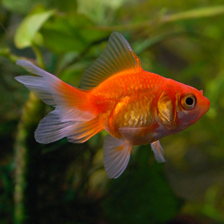

In [17]:
IMAGE_SHAPE = (224, 224)

not_red_apple = Image.open("apple_not_red.png").resize(IMAGE_SHAPE)
not_red_apple

In [18]:
not_red_apple = np.array(not_red_apple)/255.0
not_red_apple.shape

(224, 224, 3)

In [19]:
not_red_apple[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]